# Model Optimization- Random Forest

Lets first see what parameters could possibly be tuned

In [1]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
params = clf.get_params()
print("There are %d parameters for the Random Forest Model.  The Default values are:" %len(params.keys()))
for key in params.keys():
    print("%25s:   %s" %(key,params[key]))

There are 17 parameters for the Random Forest Model.  The Default values are:
                bootstrap:   True
             class_weight:   None
                criterion:   gini
                max_depth:   None
             max_features:   auto
           max_leaf_nodes:   None
    min_impurity_decrease:   0.0
       min_impurity_split:   None
         min_samples_leaf:   1
        min_samples_split:   2
 min_weight_fraction_leaf:   0.0
             n_estimators:   10
                   n_jobs:   1
                oob_score:   False
             random_state:   None
                  verbose:   0
               warm_start:   False


### Changable Parameters
* n_estimators = number of trees in the forest
* max_features = 1 < x < n_features (37)
* max_depth =None or integer 
* min_samples_split : >= 2
* min_samples_leaf: >= 1

In [2]:
# get the data and resample
import ml_utils as mu

# get the training data
data = mu.get_training_data()
X, y = mu.split_x_and_y(data)

# get the holdout and outside validation data
Xh, yh = mu.split_x_and_y(mu.get_holdout_data())
Xh, yh = mu.resample_to_equal_class_sizes(Xh, yh)

Xv, yv = mu.split_x_and_y(mu.get_validation_data())
Xv, yv = mu.resample_to_equal_class_sizes(Xv, yv)

Maximum class size is 80
Class 0 size is 48. Resampling with replacement to 80
Class 1 size has max class size (80).
Class 2 size is 11. Resampling with replacement to 80
Class 3 size is 11. Resampling with replacement to 80
Maximum class size is 32
Class 0 size is 6. Resampling with replacement to 32
Class 1 size has max class size (32).
Class 2 size is 4. Resampling with replacement to 32
Class 3 size is 8. Resampling with replacement to 32


[2018-07-11 21:48:58.877288] Starting tuning classifier__n_estimators
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   17.7s finished


Best parameters set found on development set:

{'classifier__n_estimators': 130}


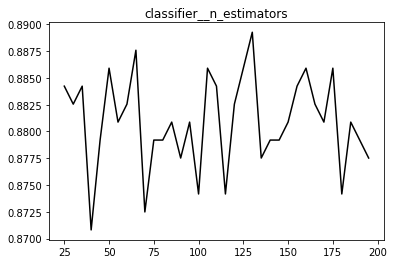

[2018-07-11 21:49:17.424560] Done with tuning classifier__n_estimators (Took 0.300 minutes)
[2018-07-11 21:49:17.424560] Starting tuning classifier__max_features
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 37 candidates, totalling 185 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:    8.6s finished


Best parameters set found on development set:

{'classifier__max_features': 25}


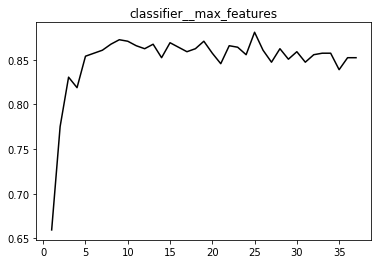

[2018-07-11 21:49:26.537324] Done with tuning classifier__max_features (Took 0.150 minutes)
[2018-07-11 21:49:26.537324] Starting tuning classifier__max_depth
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.7s finished


Best parameters set found on development set:

{'classifier__max_depth': 71}


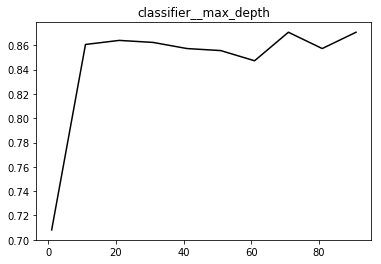

[2018-07-11 21:49:33.581344] Done with tuning classifier__max_depth (Took 0.117 minutes)
[2018-07-11 21:49:33.581344] Starting tuning classifier__min_samples_split
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters set found on development set:

{'classifier__min_samples_split': 8}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.6s finished


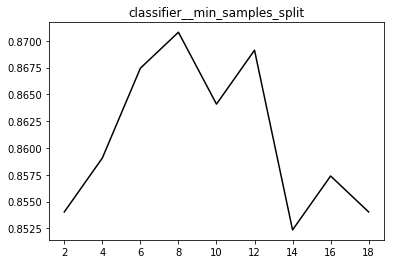

[2018-07-11 21:49:40.595674] Done with tuning classifier__min_samples_split (Took 0.117 minutes)
[2018-07-11 21:49:40.595674] Starting tuning classifier__min_samples_leaf
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.1s finished


Best parameters set found on development set:

{'classifier__min_samples_leaf': 3}


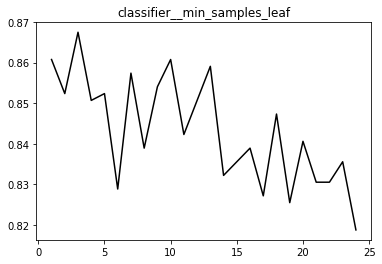

[2018-07-11 21:49:48.086581] Done with tuning classifier__min_samples_leaf (Took 0.117 minutes)


In [25]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

# parameters and ranges to plot
param_grid = {
    "classifier__n_estimators": range(25,200, 5),
    "classifier__max_features": range(1, 38, 1),
    "classifier__max_depth": range(1, 100, 10),
    "classifier__min_samples_split": range(2, 20, 2),
    "classifier__min_samples_leaf": range(1, 25, 1),
}

clf = Pipeline([
    ('standardization', StandardScaler()),
    ('oversampler', RandomOverSampler()),
    ('classifier', RandomForestClassifier())
])

for parameter, param_range in dict.items(param_grid):
    with mu.Timer("tuning %s" %parameter) as timer:
        mu.unidirectional_grid_search_optimization(clf, parameter, param_range, X, y)